In [1]:
#1- Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
#2- Reading File 1 - city_data
cityfile_path = "/Users/rashimjain/Documents/RJ_UCB/matplot-challenge/Pyber/raw_data/city_data.csv"
city_data_pd = pd.read_csv(cityfile_path)
print (city_data_pd.head())

total_data1 = city_data_pd.count(axis=0)
print ("--------------------------------------")
print (f"Count is: {total_data1}")
print ("--------------------------------------")
print ("--------------------------------------")

             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban
--------------------------------------
Count is: city            126
driver_count    126
type            126
dtype: int64
--------------------------------------
--------------------------------------


In [3]:
# Method 1 to check if the series has duplicate data
df_check = city_data_pd
data = df_check["city"]
df_check = df_check[data.isin(data[data.duplicated()])]
print ("Duplicate Data:")
print (df_check)

# The series has duplicate data and it must be removed. 
# See https://stackoverflow.com/questions/37095161/number-of-rows-changes-even-after-pandas-merge-with-left-option
# Removing duplicate data shouldn't have a major impact on analysis

city_data_pd = city_data_pd.drop_duplicates("city")
city_data_pd

total_data1 = city_data_pd.count(axis=0)
print ("--------------------------------------")
print ("--------------------------------------")
print (f"New data count after removing duplicate data is: {total_data1}")

Duplicate Data:
           city  driver_count      type
84   Port James            15  Suburban
100  Port James             3  Suburban
--------------------------------------
--------------------------------------
New data count after removing duplicate data is: city            125
driver_count    125
type            125
dtype: int64


In [4]:
#3 - Reading File 2 -  ride_data
ridefile_path = os.path.join("raw_data","ride_data.csv")
ride_data_pd = pd.read_csv(ridefile_path)
print (ride_data_pd.head())

total_data2 = ride_data_pd.count(axis=0)
print ("---------------------------------------------")
print (total_data2)

          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673
---------------------------------------------
city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64


In [5]:
#4- Combine both data sets
pyber_data = ride_data_pd.merge(city_data_pd, on = 'city', how = 'outer')
pyber_data.head()


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [6]:
#5- Create separate data frames based on city types - Urban, Suburban and Rural
urban_city = pyber_data.loc[(pyber_data["type"] == "Urban")]
suburban_city = pyber_data.loc[(pyber_data["type"] == "Suburban")]
rural_city = pyber_data.loc[(pyber_data["type"] == "Rural")]

print (urban_city.head())
print ("------------------------")
print (suburban_city.head())
print ("------------------------")
print (rural_city.head())
print ("------------------------")

       city                 date   fare        ride_id  driver_count   type
0  Sarabury  2016-01-16 13:49:27  38.35  5403689035038            46  Urban
1  Sarabury  2016-07-23 07:42:44  21.76  7546681945283            46  Urban
2  Sarabury  2016-04-02 04:32:25  38.03  4932495851866            46  Urban
3  Sarabury  2016-06-23 05:03:41  26.82  6711035373406            46  Urban
4  Sarabury  2016-09-30 12:48:34  30.30  6388737278232            46  Urban
------------------------
            city                 date   fare        ride_id  driver_count  \
1625  Port James  2016-12-04 06:16:36  15.77  2259499336994            15   
1626  Port James  2016-05-16 21:25:03  26.26  4051110168629            15   
1627  Port James  2016-01-04 22:46:29  20.25  3994763896598            15   
1628  Port James  2016-01-27 19:25:42  21.86  2433830274897            15   
1629  Port James  2016-05-30 15:35:47  38.05   424462809740            15   

          type  
1625  Suburban  
1626  Suburban  
1627 

In [7]:
#6- Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban = urban_city.groupby(['city'])['fare'].mean()
avg_fare_urban = round(avg_fare_urban,2)
total_rides_urban = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban = urban_city.groupby(['city']).count()['driver_count']

print (avg_fare_urban.head())
print ("--------------------------------------")
print (total_rides_urban.head())
print ("--------------------------------------")
print (total_drivers_urban.head())

city
Alvarezhaven    23.93
Alyssaberg      20.61
Antoniomouth    23.62
Aprilchester    21.98
Arnoldview      25.11
Name: fare, dtype: float64
--------------------------------------
city
Alvarezhaven    31
Alyssaberg      26
Antoniomouth    22
Aprilchester    19
Arnoldview      31
Name: ride_id, dtype: int64
--------------------------------------
city
Alvarezhaven    31
Alyssaberg      26
Antoniomouth    22
Aprilchester    19
Arnoldview      31
Name: driver_count, dtype: int64


In [8]:
#7- Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban = suburban_city.groupby(['city'])['fare'].mean()
avg_fare_suburban = round(avg_fare_suburban,2)
total_rides_suburban = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban = suburban_city.groupby(['city']).count()['driver_count']

print (avg_fare_suburban.head())
print ("--------------------------------------")
print (total_rides_suburban.head())
print ("--------------------------------------")
print (total_drivers_suburban.head())

city
Anitamouth      37.32
Campbellport    33.71
Carrollbury     36.61
Clarkstad       31.05
Conwaymouth     34.59
Name: fare, dtype: float64
--------------------------------------
city
Anitamouth       9
Campbellport    15
Carrollbury     10
Clarkstad       12
Conwaymouth     11
Name: ride_id, dtype: int64
--------------------------------------
city
Anitamouth       9
Campbellport    15
Carrollbury     10
Clarkstad       12
Conwaymouth     11
Name: driver_count, dtype: int64


In [9]:
#8- Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural = rural_city.groupby(['city'])['fare'].mean()
avg_fare_rural = round(avg_fare_rural,2)
total_rides_rural = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural = rural_city.groupby(['city']).count()['driver_count']

print (avg_fare_rural.head())
print ("--------------------------------------")
print (total_rides_rural.head())
print ("--------------------------------------")
print (total_drivers_rural.head())

city
East Leslie       33.66
East Stephen      39.05
East Troybury     33.24
Erikport          30.04
Hernandezshire    32.00
Name: fare, dtype: float64
--------------------------------------
city
East Leslie       11
East Stephen      10
East Troybury      7
Erikport           8
Hernandezshire     9
Name: ride_id, dtype: int64
--------------------------------------
city
East Leslie       11
East Stephen      10
East Troybury      7
Erikport           8
Hernandezshire     9
Name: driver_count, dtype: int64


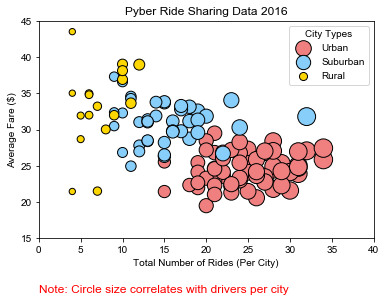

In [10]:
# 9 - Scatter Plots

plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 1, label="Urban")
plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 1, label="Suburban")
plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 1, label="Rural")

# Creating axis limits 

plt.xlim(0, 40)
plt.ylim(15, 45)

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create legend 
plt.legend(loc='upper right', title="City Types", markerscale = 1)


# Setting theme using Seaborne library function
sns.set_style('ticks')

# Ploting text string
plt.text(0,7.5, 'Note: Circle size correlates with drivers per city', fontsize=12, color='red')

plt.savefig("Images/Pyber-Ride-Sharing-Scatter_Plot.png")
plt.show()

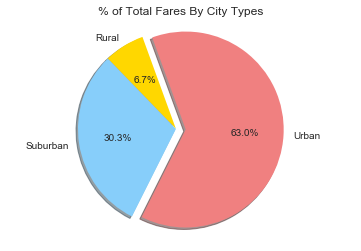

In [11]:
#10 - Plotting Pie Chart - Total Fare by City Type

total_fare = pyber_data.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=110)
plt.axis("equal")
plt.savefig("Images/Pyber-Total Fares By City Types-Pie chart.png")
plt.show()


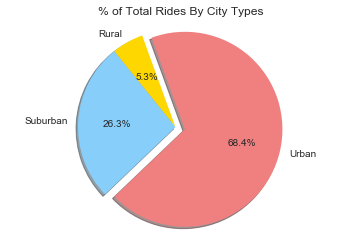

In [12]:
#11 - Plotting Pie Chart - Total Rides by City Type

total_ride = pyber_data.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_ride, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=110)
plt.axis("equal")
plt.savefig("Images/Pyber-Total Rides By City Types-Pie chart.png")
plt.show()

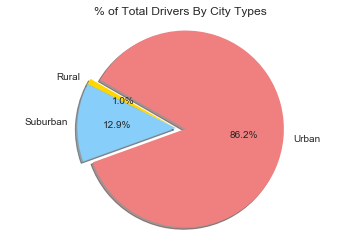

In [13]:
#11 - Plotting Pie Chart - Total Drivers by City Type

total_drivers = pyber_data.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=150)
plt.axis("equal")
plt.savefig("Images/Pyber-Total Drivers By City Types-Pie chart.png")
plt.show()